<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

<h1>Identificación automática de denuncias de delitos en mensajes de Twitter en español</h1>

### http://ingeotec.mx

### http://github.com/ingeotec

# Instalar Librerías

La bolsa de palabras se generará utilizando la librería [EvoMSA](https://evomsa.readthedocs.io). El primer paso es instalar la librería en el ambiente de trabajo con el siguiente código.

In [ ]:
try:
    import EvoMSA
except ImportError:
    !pip install evomsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.3/32.3 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.5 MB/s eta 0:00:00
  Created wheel for evomsa: filename=EvoMSA-1.9.8-cp310-cp310-linux_x86_64.whl size=32411171 sha256=e2bfcd657d6b9a457de556140a544185a3c882dd82e4fcda8e0673bfe65ade98
  Stored in directory: /root/.cache/pip/wheels/b6/9f/07/201917d5adda615a41f71c774487c39328f84a7b9de01564e0
Successfully built evomsa


# Librerías Utilizadas

Una vez que [EvoMSA](https://evomsa.readthedocs.io) ha sido instalada es momento de cargar los paquetes que se van a utilizar en este ejercicio. La primera línea carga el clasificador basado en bolsa de palabras, la segunda linea es una función para leer archivos donde cada línea está codificado en formato JSON. La tercera es para cargar las funciones que se usarán para medir el rendimiento. La cuarta y quinta instrucción son librerías que se usarán para visualizar una nube de palabras. La última línea es una librería de arreglos muy utilizada en cómputo científico.

In [ ]:
from EvoMSA import BoW
from microtc.utils import tweet_iterator
from sklearn.metrics import f1_score, recall_score, precision_score
from matplotlib import pylab as plt
from wordcloud import WordCloud
import numpy as np

# Conjunto de Datos

El conjunto de datos se puede conseguir en la página de [Delitos](https://ingeotec.github.io/Delitos) aunque en esta dirección es necesario poblar los textos dado que solamente se encuentra el identificador del Tweet. Los datos completos se encuentran en la plataforma de usada en MACTI.

Para leer los datos del conjunto de entrenamiento y prueba se utilizan las siguientes dos instrucciones. En la variable `D` se tiene los datos que se utilizarán para entrenar el clasificador basado en la bolsa de palabras y en `Dtest` los datos del conjunto de prueba, que son usados para medir el rendimiento del clasificador.

In [ ]:
D = list(tweet_iterator('delitos_train.json'))
Dtest = list(tweet_iterator('delitos_test.json'))

En la siguiente instrucción se observa el primer elemento del conjunto de entrenamiento. Se puede observar que en el campo `text` se encuentra el texto, el campo `klass` representa la etiqueta o clase, donde $0$ representa la clase negativa y $1$ la clase positiva, es decir, la presencia de un delito. El campo `id` es el identificador del Tweet y `annotations` son las clases dadas por los etiquetadores a ese ejemplo.

In [ ]:
D[0]

{'annotations': [0, 0, 0],
 'id': 1463228370364289031,
 'klass': 0,
 'text': '@mauroaboga1 Este caso tiene mucho que ver con lo que paso en EEUU, Kenosha —Kyle Rittenhouse, el notorio adolescente blanco armado acusado de asesinar a dos personas e intentar matar a una tercera durante una protesta por la violencia policial en agosto pasado, fue declarado inocente.'}

# Entrenando una Bolsa de Palabras

El clasificador que se utilizara es una máquina de soporte vectorial lineal que utiliza como representación del texto una bolsa de palabras. En la siguiente liga https://evomsa.readthedocs.io/en/docs/bow.html pueden encontrar mayor información de este sistema.

La siguiente linea entrena el clasificador basado en bolsa de palabras.

In [ ]:
bow = BoW(lang='es').fit(D)

# Predicción del Conjunto de Prueba

Una vez que el clasificador de texto está entrenado, es momento para predicir, en esta ocasión se predicen las clases del conjunto de prueba con la siguiente instrucción.


In [ ]:
hy = bow.predict(Dtest)

## Generación de Archivo de Resultados

El siguiente código se puede utilizar como base para generar el archivo de resultados con las predicciones.

Por ejemplo, nosotros pertenecemos al grupo **Profesores** entonces el archivo tiene que tener el nombre de `Profesores.txt` y cada línea tiene la predicción del elemento correspondiente en el conjunto de prueba; tal y como se muestra en el siguiente código.

In [ ]:
with open('Profesores.txt', 'w') as fpt:
    for o in hy:
        print(o, file=fpt)

## Predicción de cualquier texto

Utilizando este clasificador se puede predecir la clase de cualquier texto que se desee. Por ejemplo, la siguiente linea predice el texto *me golpearon y robaron la bicicleta en la noche.* El método `predict` recibe una lista de textos que se van a predecir, por eso el enunciado se coloca como el único elemento de una lista. Se puede observar que el clasificador predice la clase $1$ indicando que ese texto hace mención a algún delito.

In [ ]:
bow.predict(['me golpearon y robaron la bicicleta en la noche'])

array([1])

# Rendimiento

Es momento de medir el redimiento del clasificador de texto utilizado. El rendimiento se medirá en el conjunto de prueba, para lo cual es necesario tomar las etiquetas de cada ejemplo en ese conjunto. Esto se puede realizar con la siguiente instrucción.

In [ ]:
y = np.array([x['klass'] for x in Dtest])

Teniendo las etiquetas medidas en la variable `h` y las predicciones en la variable `hy`, se pueden utilizar varias medidas para analizar el rendimiento del algoritmo desde diferentes perspectivas.

En el curso de [Aprendizaje Computacional](https://ingeotec.github.io/AprendizajeComputacional/capitulos/04Rendimiento/) se puede obtener mayor información sobre medidas de rendimiento.

La primera linea define las funciones que se utilizarán para medir el rendimiento. Estas son utilizadas en la segunda linea y el resultado se despliega en la tercera instrucción.

In [ ]:
funcs =  [f1_score, recall_score, precision_score]
medida = [func(y, hy) for func in funcs]
medida

[0.746031746031746, 0.618421052631579, 0.94]

El valor de rendimiento puntual que se observa en el procedimiento anterior no permite ver la variabilidad de la medida de rendimiento. Una manera para conocer el rango de cada medida es calcular el error estándar.

El siguiente procedimiento calcula el error estándar. Para obtener mayor información sobre el método utilizado para calcular el error estándar se recomienda la información contenida en esta [liga](https://ingeotec.github.io/AprendizajeComputacional/capitulos/13Comparacion/#sec:bootstrap-error-estandar).

In [ ]:
B = []
for _ in range(500):
    s = np.random.randint(y.shape[0], size=y.shape[0])
    _ = [func(y[s], hy[s]) for func in funcs]
    B.append(_)
B = np.array(B)
error_estandar = B.std(axis=0)
error_estandar

array([0.04271121, 0.05477284, 0.03338328])

# Nube de Palabras

Tomando en cuenta que el clasificador texto utilizado es una bolsa de palabras unido con una máquina de soporte vectorial lineal, entonces es posible utilizar los coeficientes tanto de la bolsa de palabras como del clasificador para conocer los términos que son más discriminantes en la case positiva.

En la siguiente linea se obtienen los coeficientes del clasificador, estos coeficientes se guardan en la variable `w`.

In [ ]:
w = bow.estimator_instance.coef_[0]

El siguiente paso es calcular el producto entre los coeficientes del clasificador y los de la bolsa de palabras, en particular es el inverso de la frecuencia del documento. Los coficientes de la bolsa de palabras está en `bow.bow.token_weight`, este campo es un diccionario donde la llave corresponde a la i-ésima componente del espacio vectorial creado.

La siguiente instrucción calcula el producto y crea un diccionario donde la llave es el término y el valor corresponde al producto, solamente se mantienen los términos cuyo valor en el clasificador es positivo, dado que se está analizando la clase positiva.

In [ ]:
tokens = {bow.bow.id2token[id]: _w * w[id]
          for id, _w in bow.bow.token_weight.items() if w[id] > 0}

Teniendo el diccionario anterior, el siguiente paso es generar la nube de palabras. La primera linea filtra todos los términos que corresponden a q-gramas, la notación es que todos los q-grams tienen el sufijo *q:0*. La segunda linea crea la nube y finalmente se despliega.

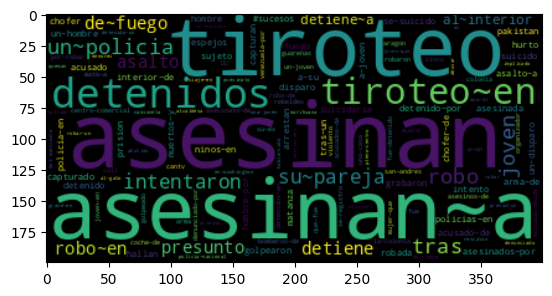

In [ ]:
words = {k: v for k, v in tokens.items() if k[:2] != 'q:'}
word_cloud = WordCloud().generate_from_frequencies(words)
plt.imshow(word_cloud, interpolation='bilinear')

Complementando el ejercicio anterior se presenta la nube de palabras con los q-gramas más significativos.

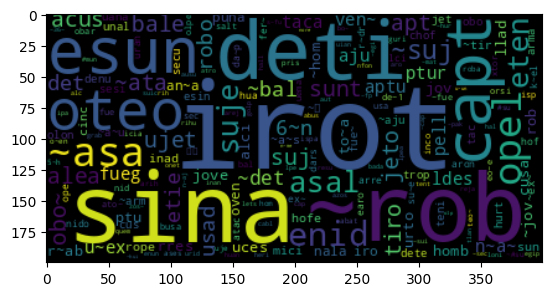

In [ ]:
words = {k[2:]: v for k, v in tokens.items() if k[:2] == 'q:'}
word_cloud = WordCloud().generate_from_frequencies(words)
plt.imshow(word_cloud, interpolation='bilinear')